In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree , export_text
from sklearn.metrics import ConfusionMatrixDisplay ,accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
churn=pd.read_csv('telecom_customer_churn.csv')
churn.shape

# fruits=pd.read_csv('C:/Users/shrey/Downloads/fruits.csv')
# fruits.shape


(7043, 38)

In [3]:
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
churn.drop(labels=['Age'],axis=1,inplace=True)
churn.drop(labels=['Married'],axis=1,inplace=True)
churn.drop(labels=['Number of Dependents'],axis=1,inplace=True)
churn.drop(labels=['City'],axis=1,inplace=True)
churn.drop(labels=['Zip Code'],axis=1,inplace=True)
churn.drop(labels=['Latitude'],axis=1,inplace=True)
churn.drop(labels=['Longitude'],axis=1,inplace=True)
churn.drop(labels=['Number of Referrals'],axis=1,inplace=True)
churn.drop(labels=['Offer'],axis=1,inplace=True)
churn.drop(labels=['Phone Service'],axis=1,inplace=True)
churn.drop(labels=['Avg Monthly Long Distance Charges'],axis=1,inplace=True)
churn.drop(labels=['Multiple Lines'],axis=1,inplace=True)
churn.drop(labels=['Internet Type'],axis=1,inplace=True)
churn.drop(labels=['Streaming Music'],axis=1,inplace=True)
churn.drop(labels=['Unlimited Data'],axis=1,inplace=True)
churn.drop(labels=['Total Refunds'],axis=1,inplace=True)
churn.drop(labels=['Total Extra Data Charges'],axis=1,inplace=True)
churn.drop(labels=['Total Long Distance Charges'],axis=1,inplace=True)
churn.drop(labels=['Total Revenue'],axis=1,inplace=True)
churn.drop(labels=['Churn Category'],axis=1,inplace=True)
churn.drop(labels=['Churn Reason'],axis=1,inplace=True)






In [5]:
x=pd.read_csv('telecom_customer_churn.csv')


In [6]:
churn['TechSupport']= x['Premium Tech Support']

churn['TenureInMonth']=x['Tenure in Months']

churn['AvgMonthlyGBDownload']=x['Avg Monthly GB Download']

churn['OnlineSecurity']=x['Online Security']

churn['OnlineBackup']=x['Online Backup']

churn['DeviceProtectionPlan']=x['Device Protection Plan']

churn['StreamingTV']=x['Streaming TV']

churn['StreamingMovies']=x['Streaming Movies']

churn['PaperlessBilling']=x['Paperless Billing']

churn['PaymentMethod']=x['Payment Method']

churn['MonthlyCharge']=x['Monthly Charge']

churn['TotalCharges']=x['Total Charges']

churn['CustomerStatus']=x['Customer Status']

churn['InternetService']=x['Internet Service']


churn.drop(labels=['Premium Tech Support'],axis=1,inplace=True)
churn.drop(labels=['Tenure in Months'],axis=1,inplace=True)
churn.drop(labels=['Avg Monthly GB Download'],axis=1,inplace=True)
churn.drop(labels=['Online Security'],axis=1,inplace=True)
churn.drop(labels=['Device Protection Plan'],axis=1,inplace=True)
churn.drop(labels=['Online Backup'],axis=1,inplace=True)
churn.drop(labels=['Streaming TV'],axis=1,inplace=True)
churn.drop(labels=['Streaming Movies'],axis=1,inplace=True)
churn.drop(labels=['Paperless Billing'],axis=1,inplace=True)
churn.drop(labels=['Payment Method'],axis=1,inplace=True)
churn.drop(labels=['Monthly Charge'],axis=1,inplace=True)
churn.drop(labels=['Total Charges'],axis=1,inplace=True)
churn.drop(labels=['Customer Status'],axis=1,inplace=True)
churn.drop(labels=['Internet Service'],axis=1,inplace=True)







In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           7043 non-null   object 
 1   Gender                7043 non-null   object 
 2   Contract              7043 non-null   object 
 3   TechSupport           5517 non-null   object 
 4   TenureInMonth         7043 non-null   int64  
 5   AvgMonthlyGBDownload  5517 non-null   float64
 6   OnlineSecurity        5517 non-null   object 
 7   OnlineBackup          5517 non-null   object 
 8   DeviceProtectionPlan  5517 non-null   object 
 9   StreamingTV           5517 non-null   object 
 10  StreamingMovies       5517 non-null   object 
 11  PaperlessBilling      7043 non-null   object 
 12  PaymentMethod         7043 non-null   object 
 13  MonthlyCharge         7043 non-null   float64
 14  TotalCharges          7043 non-null   float64
 15  CustomerStatus       

In [8]:
churn.reset_index(inplace=True)

In [9]:
churn.AvgMonthlyGBDownload.value_counts()

AvgMonthlyGBDownload
19.0    220
27.0    199
30.0    193
59.0    192
26.0    191
23.0    179
22.0    172
21.0    171
18.0    164
13.0    164
16.0    155
17.0    155
20.0    151
24.0    148
28.0    147
11.0    145
12.0    143
29.0    138
15.0    132
10.0    132
14.0    131
25.0    130
3.0     130
4.0     129
52.0    121
8.0     120
2.0     116
7.0     116
9.0     116
6.0     114
5.0     114
51.0     90
53.0     88
48.0     86
73.0     81
69.0     75
41.0     67
76.0     58
85.0     48
58.0     45
42.0     45
82.0     43
71.0     42
47.0     36
57.0     34
46.0     19
56.0     16
75.0     15
39.0      1
Name: count, dtype: int64

In [10]:
(churn.TechSupport.isna()==True).sum()

np.int64(1526)

In [11]:
(churn.AvgMonthlyGBDownload.isna() == churn.TechSupport.isna()).sum()

np.int64(7043)

In [12]:
churn[churn.AvgMonthlyGBDownload.isna()==True]  
churn[churn.TechSupport.isna()==True]

,index,Customer ID,Gender,Contract,TechSupport,TenureInMonth,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,CustomerStatus,InternetService
20,20,0023-UYUPN,Female,One Year,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,No,Bank Withdrawal,25.20,1306.30,Stayed,No
23,23,0030-FNXPP,Female,Month-to-Month,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,19.85,57.20,Joined,No
24,24,0031-PVLZI,Female,Month-to-Month,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,20.35,76.35,Churned,No
27,27,0040-HALCW,Male,Two Year,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,20.40,1090.60,Stayed,No
28,28,0042-JVWOJ,Male,One Year,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bank Withdrawal,19.60,471.85,Stayed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,7026,9970-QBCDA,Female,Month-to-Month,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,19.70,129.55,Stayed,No
7028,7028,9972-EWRJS,Female,Two Year,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bank Withdrawal,19.25,1372.90,Stayed,No
7032,7032,9975-GPKZU,Male,Two Year,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,19.75,856.50,Stayed,No
7033,7033,9975-SKRNR,Male,Month-to-Month,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,No,Credit Card,18.90,18.90,Joined,No


In [13]:
churn.drop(churn[churn.AvgMonthlyGBDownload.isna()==True].index ,axis=0, inplace=True)

In [14]:
churn.reset_index(drop=True,inplace=True)

In [15]:
churn.shape

(5517, 18)

In [16]:
churn.isna().sum()


index                   0
Customer ID             0
Gender                  0
Contract                0
TechSupport             0
TenureInMonth           0
AvgMonthlyGBDownload    0
OnlineSecurity          0
OnlineBackup            0
DeviceProtectionPlan    0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharge           0
TotalCharges            0
CustomerStatus          0
InternetService         0
dtype: int64

In [17]:
churn.drop(labels=['InternetService'],axis=1, inplace=True)

In [18]:
churn.drop(labels=['Customer ID'],axis=1,inplace=True)


In [19]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5517 non-null   int64  
 1   Gender                5517 non-null   object 
 2   Contract              5517 non-null   object 
 3   TechSupport           5517 non-null   object 
 4   TenureInMonth         5517 non-null   int64  
 5   AvgMonthlyGBDownload  5517 non-null   float64
 6   OnlineSecurity        5517 non-null   object 
 7   OnlineBackup          5517 non-null   object 
 8   DeviceProtectionPlan  5517 non-null   object 
 9   StreamingTV           5517 non-null   object 
 10  StreamingMovies       5517 non-null   object 
 11  PaperlessBilling      5517 non-null   object 
 12  PaymentMethod         5517 non-null   object 
 13  MonthlyCharge         5517 non-null   float64
 14  TotalCharges          5517 non-null   float64
 15  CustomerStatus       

In [20]:
churn.TotalCharges.value_counts() .count()  # *

np.int64(5263)

In [21]:
churn.MonthlyCharge.value_counts().count()  # *

np.int64(1500)

In [22]:
churn.PaymentMethod.value_counts()

PaymentMethod
Bank Withdrawal    3455
Credit Card        1820
Mailed Check        242
Name: count, dtype: int64

In [23]:
churn.PaperlessBilling.value_counts()

PaperlessBilling
Yes    3725
No     1792
Name: count, dtype: int64

In [24]:
churn.StreamingMovies.value_counts()

StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

In [25]:
churn.StreamingTV.value_counts()

StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

In [26]:
churn.DeviceProtectionPlan.value_counts()

DeviceProtectionPlan
No     3095
Yes    2422
Name: count, dtype: int64

In [27]:
churn.OnlineBackup.value_counts()

OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

In [28]:
churn.OnlineSecurity.value_counts()

OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

In [29]:
churn.AvgMonthlyGBDownload.value_counts().count()  # *

np.int64(49)

In [30]:
churn.TenureInMonth.value_counts().count() # *

np.int64(72)

In [31]:
churn.TechSupport.value_counts()

TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

In [32]:
churn.Contract.value_counts()

Contract
Month-to-Month    3092
Two Year          1241
One Year          1184
Name: count, dtype: int64

In [33]:
churn.Gender.value_counts()

Gender
Male      2776
Female    2741
Name: count, dtype: int64

In [34]:
churn[churn.TenureInMonth!=int()].value_counts().count()

np.int64(5517)

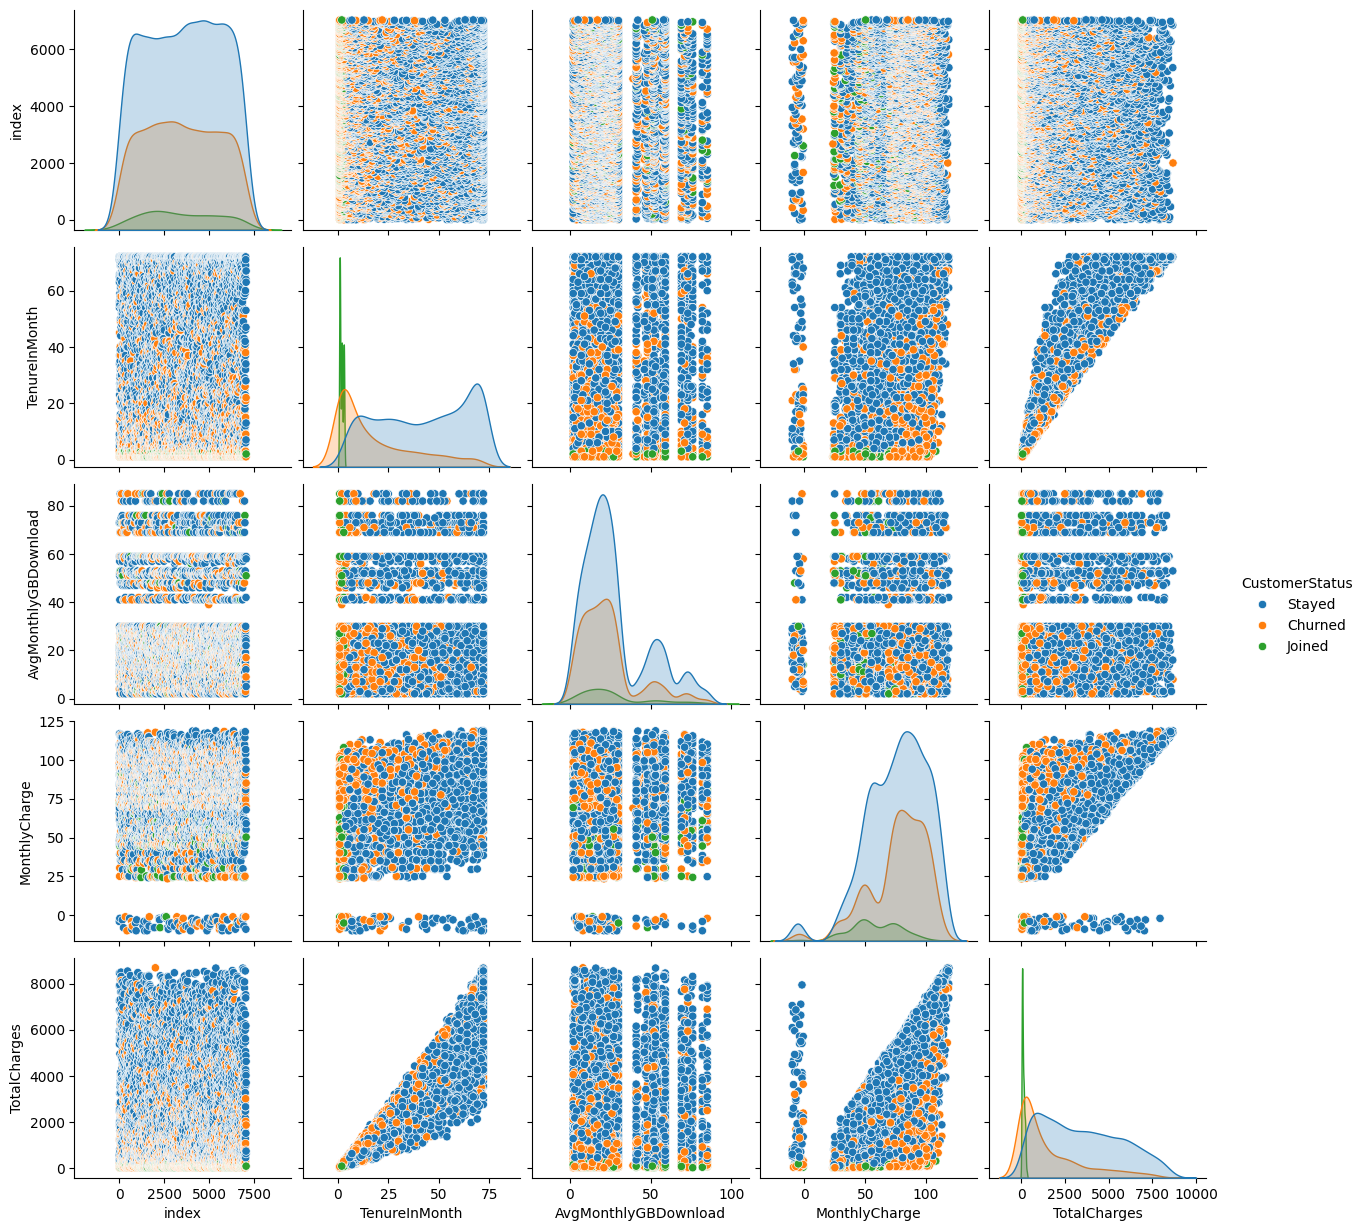

In [35]:
sns.pairplot(data=churn, hue='CustomerStatus')
plt.show()

In [36]:
# TenureInMonth and TotalCharges performence good

In [37]:
churn['TenureInMonth']= churn['TenureInMonth'] .astype('float64')
churn['AvgMonthlyGBDownload']= churn['AvgMonthlyGBDownload'] .astype('float64')
churn['MonthlyCharge']= churn['MonthlyCharge'] .astype('float64')
churn['TotalCharges']= churn['TotalCharges'] .astype('float64')

In [38]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5517 non-null   int64  
 1   Gender                5517 non-null   object 
 2   Contract              5517 non-null   object 
 3   TechSupport           5517 non-null   object 
 4   TenureInMonth         5517 non-null   float64
 5   AvgMonthlyGBDownload  5517 non-null   float64
 6   OnlineSecurity        5517 non-null   object 
 7   OnlineBackup          5517 non-null   object 
 8   DeviceProtectionPlan  5517 non-null   object 
 9   StreamingTV           5517 non-null   object 
 10  StreamingMovies       5517 non-null   object 
 11  PaperlessBilling      5517 non-null   object 
 12  PaymentMethod         5517 non-null   object 
 13  MonthlyCharge         5517 non-null   float64
 14  TotalCharges          5517 non-null   float64
 15  CustomerStatus       

<Axes: xlabel='AvgMonthlyGBDownload', ylabel='count'>

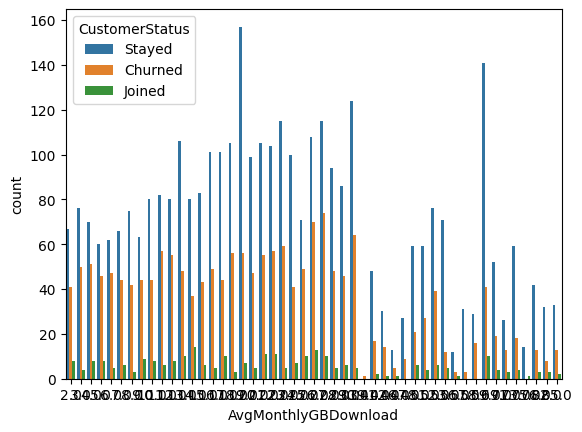

In [39]:
sns.countplot(x='AvgMonthlyGBDownload',data=churn,hue='CustomerStatus')  

<Axes: xlabel='CustomerStatus', ylabel='count'>

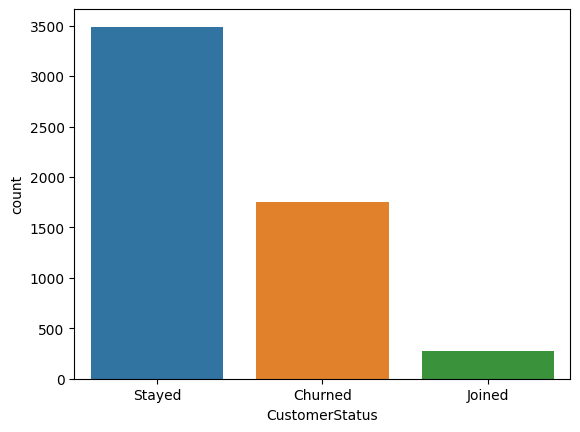

In [40]:
sns.countplot(x='CustomerStatus',data=churn,hue='CustomerStatus')  # *

<Axes: xlabel='PaymentMethod', ylabel='count'>

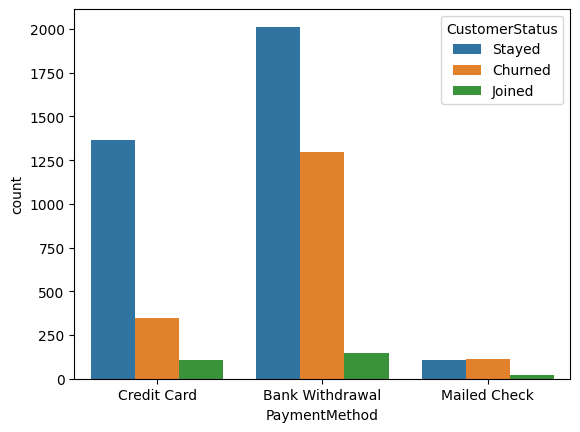

In [41]:
sns.countplot(x='PaymentMethod',data=churn,hue='CustomerStatus')  # *

<Axes: xlabel='PaperlessBilling', ylabel='count'>

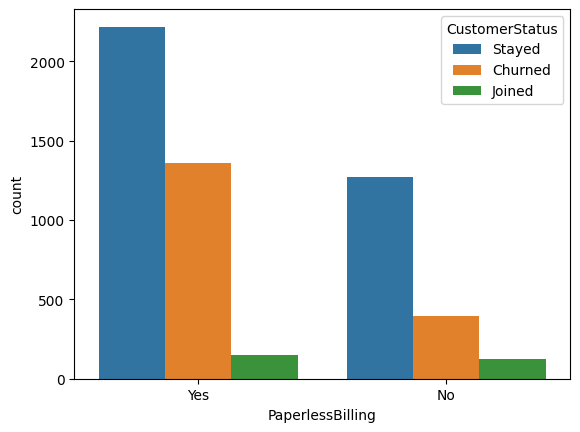

In [42]:
sns.countplot(x='PaperlessBilling',data=churn,hue='CustomerStatus') # *


<Axes: xlabel='StreamingMovies', ylabel='count'>

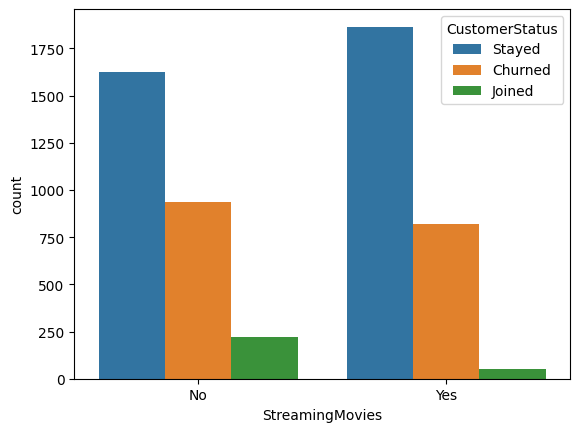

In [43]:
sns.countplot(x='StreamingMovies',data=churn,hue='CustomerStatus')

<Axes: xlabel='StreamingTV', ylabel='count'>

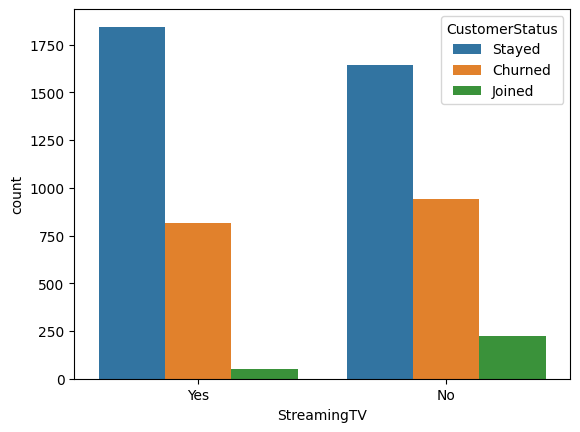

In [44]:
sns.countplot(x='StreamingTV',data=churn,hue='CustomerStatus')


<Axes: xlabel='DeviceProtectionPlan', ylabel='count'>

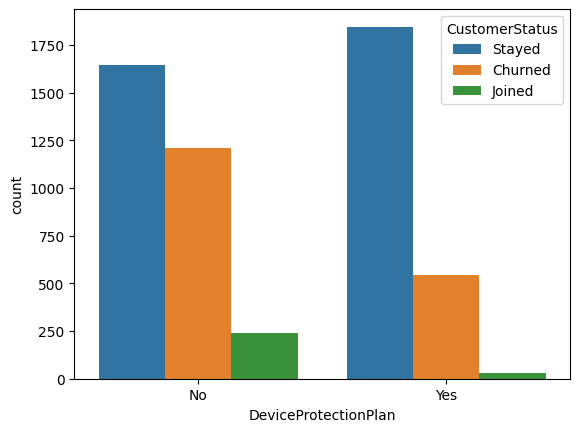

In [45]:
sns.countplot(x='DeviceProtectionPlan',data=churn,hue='CustomerStatus')


<Axes: xlabel='OnlineBackup', ylabel='count'>

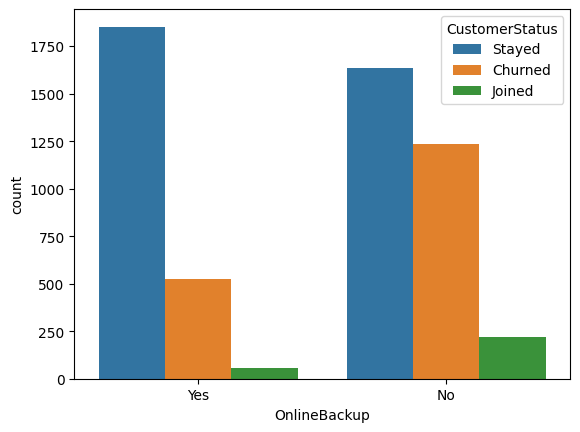

In [46]:
sns.countplot(x='OnlineBackup',data=churn,hue='CustomerStatus')  #OnlineBakup,OnlineSecurity,tenure


<Axes: xlabel='OnlineSecurity', ylabel='count'>

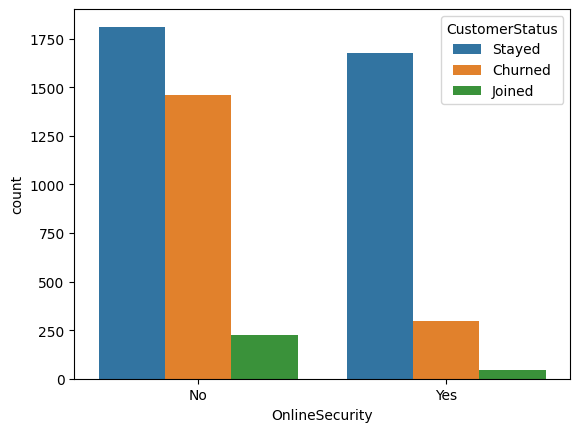

In [47]:
sns.countplot(x='OnlineSecurity',data=churn,hue='CustomerStatus')


<Axes: xlabel='TechSupport', ylabel='count'>

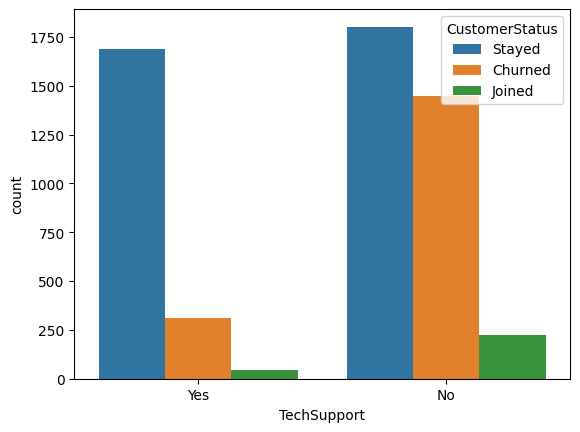

In [48]:

sns.countplot(x='TechSupport',data=churn,hue='CustomerStatus')

In [49]:
churn.shape

(5517, 16)

In [50]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5517 non-null   int64  
 1   Gender                5517 non-null   object 
 2   Contract              5517 non-null   object 
 3   TechSupport           5517 non-null   object 
 4   TenureInMonth         5517 non-null   float64
 5   AvgMonthlyGBDownload  5517 non-null   float64
 6   OnlineSecurity        5517 non-null   object 
 7   OnlineBackup          5517 non-null   object 
 8   DeviceProtectionPlan  5517 non-null   object 
 9   StreamingTV           5517 non-null   object 
 10  StreamingMovies       5517 non-null   object 
 11  PaperlessBilling      5517 non-null   object 
 12  PaymentMethod         5517 non-null   object 
 13  MonthlyCharge         5517 non-null   float64
 14  TotalCharges          5517 non-null   float64
 15  CustomerStatus       

In [51]:
churn['AvgMonthlyGBDownload'].describe()

count    5517.000000
mean       26.189958
std        19.586585
min         2.000000
25%        13.000000
50%        21.000000
75%        30.000000
max        85.000000
Name: AvgMonthlyGBDownload, dtype: float64

In [52]:
churn.columns

Index(['index', 'Gender', 'Contract', 'TechSupport', 'TenureInMonth',
       'AvgMonthlyGBDownload', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtectionPlan', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge', 'TotalCharges',
       'CustomerStatus'],
      dtype='object')

In [53]:
# tenure ,total charge ,payment method, paper billing ,device protection plane
X=churn[['Contract', 'TenureInMonth', 'AvgMonthlyGBDownload', 'MonthlyCharge',
       'TotalCharges']]
y=churn['CustomerStatus']

In [54]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5517 non-null   int64  
 1   Gender                5517 non-null   object 
 2   Contract              5517 non-null   object 
 3   TechSupport           5517 non-null   object 
 4   TenureInMonth         5517 non-null   float64
 5   AvgMonthlyGBDownload  5517 non-null   float64
 6   OnlineSecurity        5517 non-null   object 
 7   OnlineBackup          5517 non-null   object 
 8   DeviceProtectionPlan  5517 non-null   object 
 9   StreamingTV           5517 non-null   object 
 10  StreamingMovies       5517 non-null   object 
 11  PaperlessBilling      5517 non-null   object 
 12  PaymentMethod         5517 non-null   object 
 13  MonthlyCharge         5517 non-null   float64
 14  TotalCharges          5517 non-null   float64
 15  CustomerStatus       

In [55]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
columns=['Contract']

for i in columns:
    X[i] = encoding.fit_transform(X[i])


C:\Users\shrey\AppData\Local\Temp\ipykernel_16088\3892166021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = encoding.fit_transform(X[i])


In [56]:
X

,Contract,TenureInMonth,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges
0,1,9.0,16.0,65.60,593.30
1,0,9.0,10.0,-4.00,542.40
2,0,4.0,30.0,73.90,280.85
3,0,13.0,4.0,98.00,1237.85
4,0,3.0,11.0,83.90,267.40
...,...,...,...,...,...
5512,1,13.0,59.0,55.15,742.90
5513,0,22.0,17.0,85.10,1873.70
5514,0,2.0,51.0,50.30,92.75
5515,2,67.0,58.0,67.85,4627.65


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,y_train.shape

((4137, 5), (4137,))

In [58]:
model=DecisionTreeClassifier(criterion='entropy' ,splitter='random')
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9995165578921924, 0.7297101449275363)

In [59]:
X.columns[model.feature_importances_>0.1]

Index(['Contract', 'TenureInMonth', 'AvgMonthlyGBDownload', 'MonthlyCharge',
       'TotalCharges'],
      dtype='object')

In [60]:
model.get_depth()

28

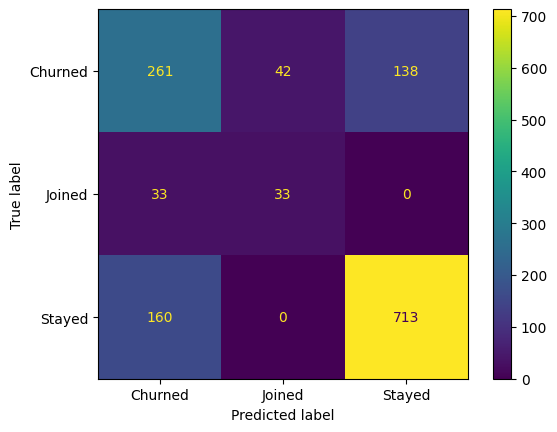

In [61]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [62]:
churn.nunique()

index                   5517
Gender                     2
Contract                   3
TechSupport                2
TenureInMonth             72
AvgMonthlyGBDownload      49
OnlineSecurity             2
OnlineBackup               2
DeviceProtectionPlan       2
StreamingTV                2
StreamingMovies            2
PaperlessBilling           2
PaymentMethod              3
MonthlyCharge           1500
TotalCharges            5263
CustomerStatus             3
dtype: int64